In [1]:
using PyPlot

In [3]:
using Jacobi

In [4]:
remap(x,a,b) = ((1-x).*a + (1+x).*b)/2
dremap(x,a,b) = (b-a)/2
dremap(lim)   = (lim[2] - lim[1])/2

dremap (generic function with 2 methods)

In [5]:
function  ϕ_matrix(ψj,Q,M)
    ϕ = zeros(Q,M)
    ξ = zglj(Q)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψj(i,ξ[j],M)
        end
    end
  return ϕ
end 

ϕ_matrix (generic function with 1 method)

In [218]:
function cria_Ae(e,M,Q,e_M,jac)
    A = zeros(M,M)
    ξ = zglj(Q)
    w = wglj(ξ)
    ϕ = ϕ_matrix(ψ,Q,M)
    for i in 1:M
        for j in 1:M
            temp = 0.0
            for q in 1:Q
                temp = temp + ϕ[q,i]*ϕ[q,j]*w[q]*jac
            end
            A[i,j] = temp
        end
    end
    return A
end

cria_Ae (generic function with 1 method)

In [7]:
function map_matrix(Nel)
    nos = zglj(Nel+1)
    matrix = zeros(Nel,2)
    matrix[1,1],matrix[1,2]=1,2
    for i in 2:Nel
        matrix[i,1] = i
        matrix[i,2] = i + 1
    end
    return round(Int64,matrix)
end

map_matrix (generic function with 1 method)

In [8]:
function ψ(p,E,M)
    if(p == 1)
        return  (1-E)/2
    elseif(p == 2)
        return  (1+E)/2
    end
end 

ψ (generic function with 1 method)

In [11]:
using PyPlot

In [110]:
function mass_matrix(map,Nl,Q,Ne,e_M,jac)
    z   = zglj(Q)
    w   = wglj(z,.0,.0)
    A   = zeros(Ne+1,Ne+1)
    for e in 1:Ne
        Ae= cria_Ae(e,Nl,Q,e_M,jac(e_M[e,:]))
        for i in 1:2
            for j in 1:2
                ig = map[e,i]
                jg = map[e,j]
                A[ig,jg] += Ae[i,j]
            end
        end
    end
    return A
end


mass_matrix (generic function with 1 method)

In [215]:
#cria_Ae(e,M,Q,e_M,jac)
cria_Ae(1,2,2,e_M,1)
#ϕ_matrix(ψ,2,2)


2x2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [90]:
function elem_matrix(Nel)
    nos = zglj(Nel+1)
    matrix = zeros(Nel,2)
    matrix[1,1],matrix[1,2]=nos[1],nos[2]
    for i in 2:Nel
        matrix[i,1] = nos[i] 
        matrix[i,2] = nos[i + 1]
    end
    return matrix
end

3x2 Array{Float64,2}:
 -1.0       -0.447214
 -0.447214   0.447214
  0.447214   1.0     

In [229]:
Nel = 3
Q = 2
M = 2
fun(x) = sin(x*2*pi)
e_M = elem_matrix(Nel)
ϕ   = ϕ_matrix(ψ,Q,2)
z   = zglj(Q)
w   = wglj(z,.0,.0)
map = map_matrix(Nel)
M   = mass_matrix(map,M,Q,Nel,e_M,dremap)


4x4 Array{Float64,2}:
 0.276393  0.0       0.0       0.0     
 0.0       0.723607  0.0       0.0     
 0.0       0.0       0.723607  0.0     
 0.0       0.0       0.0       0.276393

In [158]:
function  ϕ_matrix2(ψj,Q,M)
    ϕ = zeros(Q,M)
    ξ = zglj(Q)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψj(i,ξ[j],M)
        end
    end
  return ϕ
end

ϕ_matrix2 (generic function with 1 method)

In [159]:
function ψj2(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == 2)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 .* jacobi(E, p-3, 1, 1)
    end
end 

ψj2 (generic function with 1 method)

In [166]:
function fr_vector(fun,M,Q)
    fr = zeros(M)
    ξ = zglj(Q)
    ϕ = ϕ_matrix2(ψj2,Q,M)
    for i in 1:M
        temp = 0.0
        for q in 1:Q
            temp = temp + fun(ξ[q])*ϕ[q,i]*w[q]
        end
        fr[i]= temp
    end
    return fr
end

fr_vector (generic function with 2 methods)

In [173]:
fr = fr_vector(fun,4,10)
uh = M\fr
uq =  ϕ_matrix2(ψj,4,4) * uh

4-element Array{Float64,1}:
  2.10499   
  1.38115   
  0.00576621
 -0.827502  

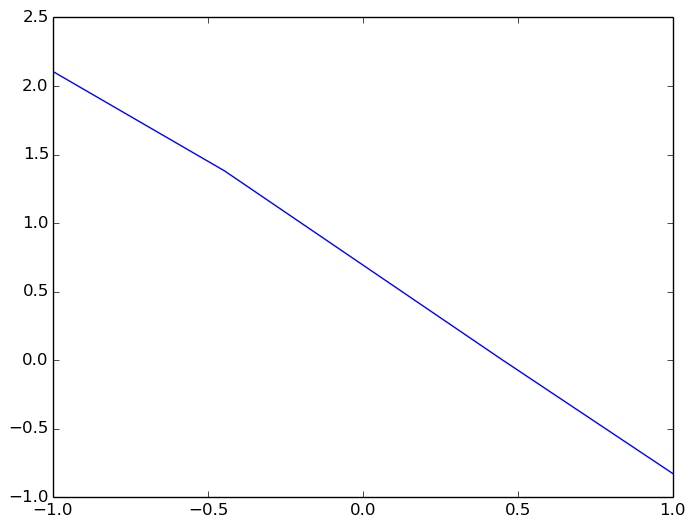

4-element Array{Float64,1}:
 -2.10499 
 -1.70677 
  0.319853
  0.827502

In [180]:
ue = fun(zglj(4))
#plot(zglj(4),ue)
plot(zglj(4),uq)
ue - uq

In [200]:
function ϕ_global(map,Nl,Q,Ne,e_M,jac)
    z   = zglj(Q)
    w   = wglj(z,.0,.0)
    ϕ   = zeros(Ne+1,Ne+1)
    for e in 1:Ne
        ϕe= ϕ_matrix(ψj,Q,2)
        for i in 1:2
            for j in 1:2
                ig = map[e,i]
                jg = map[e,j]
                ϕ[ig,jg] += ϕe[i,j]
            end
        end
    end
    return ϕ
end
ϕg = ϕ_global(map,M,Q,Nel,e_M,dremap)
ϕg

4x4 Array{Float64,2}:
 1.0       0.0       0.0       0.0     
 0.959767  1.04023   0.0       0.0     
 0.0       0.959767  1.04023   0.0     
 0.0       0.0       0.959767  0.040233

In [ ]:
for 